In [1]:
!pip install ultralytics
!pip install opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.1/800.1 kB 19.4 MB/s eta 0:00:0000:01


In [2]:
import ultralytics
from ultralytics import YOLO
import cv2
import os
from IPython.display import display, Image
import matplotlib.pyplot as plt
import glob

In [3]:
import os
for dirname, _, _ in os.walk('/kaggle/input'):
    print(dirname)

/kaggle/input
/kaggle/input/gdvtry
/kaggle/input/gdvtry/road_lane
/kaggle/input/gdvtry/road_lane/valid
/kaggle/input/gdvtry/road_lane/valid/labels
/kaggle/input/gdvtry/road_lane/valid/images
/kaggle/input/gdvtry/road_lane/test
/kaggle/input/gdvtry/road_lane/test/labels
/kaggle/input/gdvtry/road_lane/test/images
/kaggle/input/gdvtry/road_lane/train
/kaggle/input/gdvtry/road_lane/train/labels
/kaggle/input/gdvtry/road_lane/train/images


In [4]:
# Define the path to the YAML configuration file
dataset_yaml_path = '/kaggle/input/gdvtry/road_lane/data.yaml'

In [5]:
# Load and train the YOLOv8 model
model = YOLO('yolov8l.yaml')
model.train(data=dataset_yaml_path, epochs=45, imgsz=640, patience=5)

Ultralytics YOLOv8.2.54 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=/kaggle/input/gdvtry/road_lane/data.yaml, epochs=45, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]
2024-07-11 18:59:58,148	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-11 18:59:59,422	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 97.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/gdvtry/road_lane/train/labels... 2167 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2167/2167 [00:06<00:00, 311.67it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/gdvtry/road_lane/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/gdvtry/road_lane/valid/labels... 417 images, 1 backgrounds, 0 corrupt: 100%|██████████| 417/417 [00:01<00:00, 290.71it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/gdvtry/road_lane/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 45 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/45        11G      4.031      4.602       3.88         51        640: 100%|██████████| 136/136 [02:09<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.39it/s]


                   all        417       1966       0.32     0.0109    0.00235   0.000658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/45      10.7G      2.735      3.217      2.924         26        640: 100%|██████████| 136/136 [02:05<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966      0.574      0.154      0.116     0.0401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/45      10.9G      2.128      2.407      2.262         51        640: 100%|██████████| 136/136 [02:05<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.57it/s]

                   all        417       1966      0.492      0.239      0.198     0.0956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/45        11G      1.855      2.037      1.946         72        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966      0.453      0.399      0.308       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/45      11.1G      1.695        1.8       1.79         55        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.615      0.335      0.376      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/45      11.2G      1.576      1.699      1.702         41        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966      0.497      0.461      0.414      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/45      11.2G      1.509      1.604      1.618         50        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966      0.497      0.493      0.473      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/45      11.2G      1.461      1.524      1.559         70        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.539      0.482      0.505      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/45      11.2G      1.393      1.427      1.509         45        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.444      0.574      0.549      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/45      11.2G      1.373      1.385      1.486         75        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.699      0.539      0.588      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/45      11.2G      1.363      1.376       1.48         55        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966       0.62      0.587      0.604      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/45      11.2G      1.309      1.327      1.446         68        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966      0.548       0.61      0.608       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/45      11.2G      1.288      1.266      1.422         71        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.648      0.597      0.625        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/45      11.2G      1.261      1.242      1.399         93        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        417       1966      0.628      0.624      0.651      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/45      11.2G       1.23      1.229      1.373         41        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966      0.658      0.614      0.635      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/45      11.2G      1.226      1.186       1.37         24        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        417       1966      0.639      0.696      0.673      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/45      11.2G      1.199      1.168      1.346         36        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        417       1966      0.694      0.685      0.698      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/45      11.2G       1.18       1.16      1.338         56        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        417       1966      0.668      0.684       0.72      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/45      11.2G      1.156      1.134      1.328         62        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966      0.671      0.735      0.714      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/45      11.2G      1.154      1.095      1.308         37        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        417       1966      0.673        0.7       0.71      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/45      11.2G      1.146      1.091      1.305         51        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966       0.68      0.692      0.712      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/45      11.3G      1.124       1.07      1.289         68        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        417       1966       0.69      0.728      0.734      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/45      11.2G      1.109      1.055      1.285         63        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        417       1966      0.765      0.711       0.77      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/45      11.2G      1.089      1.038      1.267         77        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.732      0.701      0.751       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/45      11.3G      1.093      1.022      1.262         54        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.799      0.704      0.754      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/45      11.2G      1.077      1.013      1.249         34        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.796      0.696      0.775      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/45      11.2G      1.041     0.9751      1.238         27        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.756      0.712      0.773       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/45      11.2G      1.053     0.9815      1.246         37        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966       0.72       0.77       0.79      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/45      11.2G      1.033     0.9617      1.233         89        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.772      0.764      0.791      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/45      11.2G      1.024     0.9502      1.224         28        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        417       1966       0.82      0.704      0.787      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/45      11.2G       1.01     0.9373       1.21         44        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        417       1966      0.741      0.773      0.807      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/45      11.3G      1.003     0.9072      1.192         64        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966       0.76      0.756      0.785      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/45      11.2G     0.9961     0.9061      1.196         81        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.701      0.797      0.803      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/45      11.2G     0.9767     0.8879      1.186         36        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.725      0.768      0.789       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/45      11.2G     0.9733     0.8695      1.183         55        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.778      0.718      0.788      0.561


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/45      11.2G     0.9626     0.8361       1.18         38        640: 100%|██████████| 136/136 [02:04<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.777      0.769      0.813      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/45      11.2G     0.9417     0.8084      1.172         25        640: 100%|██████████| 136/136 [02:03<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.776      0.797      0.838      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/45      11.2G     0.9437     0.8012      1.171         42        640: 100%|██████████| 136/136 [02:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.829      0.746      0.833      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/45      11.2G     0.9202     0.7745      1.155         25        640: 100%|██████████| 136/136 [02:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.737      0.809      0.821      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/45      11.2G     0.9063     0.7437      1.141         31        640: 100%|██████████| 136/136 [02:03<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.785      0.791      0.836      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/45      11.2G     0.8955     0.7491      1.142         28        640: 100%|██████████| 136/136 [02:03<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.794      0.795      0.843      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/45      11.2G     0.8795     0.7148      1.126         25        640: 100%|██████████| 136/136 [02:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.829      0.752      0.832      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/45      11.2G       0.87     0.7265      1.126         12        640: 100%|██████████| 136/136 [02:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        417       1966      0.751      0.847      0.849      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/45      11.2G     0.8585     0.6863       1.12         48        640: 100%|██████████| 136/136 [02:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        417       1966      0.788      0.827      0.857      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/45      11.1G     0.8534     0.6728      1.111         38        640: 100%|██████████| 136/136 [02:04<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        417       1966       0.84      0.813       0.87       0.66



45 epochs completed in 1.702 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.54 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8l summary (fused): 268 layers, 43616631 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.09it/s]


                   all        417       1966       0.84      0.813       0.87       0.66
              BUS LANE         32         32       0.79      0.941      0.959      0.736
        Yellow marking         28         29       0.94      0.828      0.913      0.657
                Line 1        218       1212      0.824      0.665      0.762      0.553
                Line 2         25         59      0.757      0.371      0.513      0.266
             Crosswalk        127        132      0.804      0.841      0.903      0.636
               Diamond         65        109      0.944          1       0.99      0.694
                  SLOW         13         21          1      0.842      0.984      0.709
            Left arrow         17         19      0.758      0.737      0.776      0.652
         Forward arrow        140        228      0.931      0.934       0.97       0.77
    Forward-left arrow         43         46      0.821      0.935      0.907      0.778
   Forward-right arro

lr/pg0,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁
lr/pg1,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁
lr/pg2,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁
metrics/mAP50(B),▁▂▃▃▄▄▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████
metrics/mAP50-95(B),▁▁▂▃▃▃▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▆▆▇▇▇▇▇▇▇▇▇██▇█████
metrics/precision(B),▁▄▃▃▅▃▃▄▆▅▄▅▅▆▅▆▆▆▆▆▇▇▇▇▆▇█▇▇▆▆▇▇█▇▇▇█▇█
metrics/recall(B),▁▂▃▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇█▇███▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a4af3f6bc10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

In [6]:
metrics = model.val()

Ultralytics YOLOv8.2.54 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8l summary (fused): 268 layers, 43616631 parameters, 0 gradients, 164.9 GFLOPs


val: Scanning /kaggle/input/gdvtry/road_lane/valid/labels... 417 images, 1 backgrounds, 0 corrupt: 100%|██████████| 417/417 [00:00<00:00, 632.62it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/gdvtry/road_lane/valid is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:13<00:00,  1.94it/s]


                   all        417       1966       0.84      0.813       0.87       0.66
              BUS LANE         32         32       0.79      0.943      0.959       0.74
        Yellow marking         28         29      0.941      0.828      0.914      0.658
                Line 1        218       1212      0.823      0.664      0.762      0.555
                Line 2         25         59      0.756      0.368      0.502      0.262
             Crosswalk        127        132      0.799      0.841      0.902      0.634
               Diamond         65        109      0.944          1       0.99      0.699
                  SLOW         13         21          1      0.842      0.984      0.709
            Left arrow         17         19      0.756      0.737      0.776      0.653
         Forward arrow        140        228       0.93      0.934       0.97      0.774
    Forward-left arrow         43         46      0.821      0.935      0.907      0.784
   Forward-right arro

In [7]:
# Display mAP (mean Average Precision) for the model
map_50 = metrics.box.map50
map_50_95 = metrics.box.map
print(f"mAP@0.5: {map_50:.2f}")
print(f"mAP@0.5:0.95: {map_50_95:.2f}")

mAP@0.5: 0.87
mAP@0.5:0.95: 0.66


In [8]:
trained_model_path = '/kaggle/working/yolov8n.pt'

In [9]:
# Load the previously trained model
model2 = YOLO(trained_model_path)  # Use your previously trained model weights

# Enable automatic hyperparameter optimization
model2.train(data=dataset_yaml_path, epochs=45, imgsz=640, patience=5)

Ultralytics YOLOv8.2.54 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolov8n.pt, data=/kaggle/input/gdvtry/road_lane/data.yaml, epochs=45, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

wandb: Currently logged in as: gayathri-devi2603 (gayuvidhya). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/gdvtry/road_lane/train/labels... 2167 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2167/2167 [00:03<00:00, 665.59it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/gdvtry/road_lane/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/gdvtry/road_lane/valid/labels... 417 images, 1 backgrounds, 0 corrupt: 100%|██████████| 417/417 [00:00<00:00, 524.27it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/gdvtry/road_lane/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train3
Starting training for 45 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/45      4.79G      1.417      3.207      1.213         51        640: 100%|██████████| 136/136 [00:37<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.84it/s]


                   all        417       1966      0.695      0.214      0.243      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/45      3.25G      1.234      1.976      1.089         26        640: 100%|██████████| 136/136 [00:33<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.65it/s]

                   all        417       1966      0.445       0.44      0.404      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/45      3.39G      1.213      1.766      1.084         51        640: 100%|██████████| 136/136 [00:32<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.77it/s]

                   all        417       1966       0.63      0.497      0.509      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/45      3.25G      1.169      1.588       1.06         72        640: 100%|██████████| 136/136 [00:31<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.08it/s]

                   all        417       1966      0.616       0.59      0.605      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/45      3.33G      1.151      1.468      1.055         55        640: 100%|██████████| 136/136 [00:32<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.10it/s]

                   all        417       1966      0.625      0.623      0.635      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/45      3.27G      1.123      1.382      1.047         41        640: 100%|██████████| 136/136 [00:31<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.25it/s]

                   all        417       1966      0.581      0.657       0.66       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/45      3.27G      1.104      1.308      1.036         50        640: 100%|██████████| 136/136 [00:31<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.46it/s]

                   all        417       1966        0.6      0.658      0.657      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/45      3.28G      1.098      1.255      1.027         70        640: 100%|██████████| 136/136 [00:32<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.10it/s]

                   all        417       1966      0.666      0.664      0.704      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/45      3.35G      1.056      1.181      1.012         45        640: 100%|██████████| 136/136 [00:32<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.18it/s]

                   all        417       1966      0.685      0.702      0.704      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/45       3.3G       1.05      1.141      1.007         75        640: 100%|██████████| 136/136 [00:32<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.91it/s]

                   all        417       1966      0.732      0.658      0.716      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/45      3.32G       1.05      1.124      1.017         55        640: 100%|██████████| 136/136 [00:31<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.98it/s]

                   all        417       1966      0.726      0.672      0.724      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/45      3.28G      1.024      1.092      1.004         68        640: 100%|██████████| 136/136 [00:31<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.20it/s]

                   all        417       1966      0.758      0.692      0.746       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/45      3.27G      1.017      1.052     0.9927         71        640: 100%|██████████| 136/136 [00:32<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.14it/s]

                   all        417       1966      0.699      0.728      0.767      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/45      3.27G      1.001      1.013     0.9906         93        640: 100%|██████████| 136/136 [00:31<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.11it/s]

                   all        417       1966      0.736       0.73      0.757      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/45      3.24G      1.006     0.9961      0.991         41        640: 100%|██████████| 136/136 [00:32<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.13it/s]

                   all        417       1966      0.726      0.756      0.781      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/45      3.27G      0.985     0.9883     0.9854         24        640: 100%|██████████| 136/136 [00:31<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.05it/s]

                   all        417       1966      0.754      0.774      0.789      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/45      3.27G     0.9814     0.9656     0.9842         36        640: 100%|██████████| 136/136 [00:31<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.99it/s]

                   all        417       1966      0.746      0.718      0.762      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/45      3.33G     0.9663     0.9477     0.9736         56        640: 100%|██████████| 136/136 [00:31<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.17it/s]

                   all        417       1966      0.757      0.802      0.807      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/45      3.27G     0.9595       0.92     0.9748         62        640: 100%|██████████| 136/136 [00:32<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.10it/s]

                   all        417       1966      0.757      0.811      0.807       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/45      3.25G     0.9491      0.891     0.9689         37        640: 100%|██████████| 136/136 [00:31<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.96it/s]

                   all        417       1966      0.725      0.771      0.794      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/45      3.27G       0.95     0.8974     0.9713         51        640: 100%|██████████| 136/136 [00:32<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.29it/s]

                   all        417       1966      0.808      0.728      0.797      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/45      3.26G      0.937     0.8975     0.9669         68        640: 100%|██████████| 136/136 [00:31<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.15it/s]

                   all        417       1966      0.763      0.802      0.818      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/45      3.24G     0.9344     0.8607     0.9624         63        640: 100%|██████████| 136/136 [00:32<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.20it/s]

                   all        417       1966      0.791      0.822      0.842      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/45      3.26G     0.9185     0.8398     0.9602         77        640: 100%|██████████| 136/136 [00:31<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.84it/s]

                   all        417       1966      0.776      0.787      0.813      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/45      3.27G     0.9225     0.8308     0.9613         54        640: 100%|██████████| 136/136 [00:31<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.32it/s]

                   all        417       1966      0.842      0.804      0.858      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/45      3.27G     0.9205     0.8266     0.9606         34        640: 100%|██████████| 136/136 [00:31<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.13it/s]

                   all        417       1966      0.855      0.767      0.829       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/45      3.27G     0.8929     0.8006     0.9513         27        640: 100%|██████████| 136/136 [00:32<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.00it/s]

                   all        417       1966      0.872       0.78      0.847      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/45      3.28G     0.9019     0.7825     0.9569         37        640: 100%|██████████| 136/136 [00:31<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.24it/s]

                   all        417       1966      0.846      0.815      0.864      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/45      3.28G     0.8832     0.7741     0.9484         89        640: 100%|██████████| 136/136 [00:31<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.06it/s]

                   all        417       1966      0.846      0.782      0.858       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/45      3.28G     0.8774     0.7664     0.9453         28        640: 100%|██████████| 136/136 [00:32<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.28it/s]

                   all        417       1966      0.817      0.833      0.862      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/45      3.27G     0.8812     0.7604     0.9455         44        640: 100%|██████████| 136/136 [00:31<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.04it/s]

                   all        417       1966      0.882      0.832      0.885      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/45      3.26G      0.871     0.7416       0.94         64        640: 100%|██████████| 136/136 [00:31<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.21it/s]

                   all        417       1966      0.861      0.823      0.874      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/45      3.28G     0.8681     0.7326      0.938         81        640: 100%|██████████| 136/136 [00:33<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.81it/s]

                   all        417       1966      0.826      0.833      0.865      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/45      3.25G     0.8519     0.7221     0.9357         36        640: 100%|██████████| 136/136 [00:31<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  4.84it/s]

                   all        417       1966      0.864      0.827      0.891      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/45      3.35G     0.8577     0.7223     0.9381         55        640: 100%|██████████| 136/136 [00:32<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.10it/s]

                   all        417       1966      0.873      0.833      0.887      0.683


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/45      3.36G     0.8314     0.6634     0.9313         38        640: 100%|██████████| 136/136 [00:27<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.26it/s]

                   all        417       1966      0.912      0.787      0.887      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/45      3.19G      0.817      0.638     0.9252         25        640: 100%|██████████| 136/136 [00:25<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.43it/s]

                   all        417       1966      0.869      0.826      0.883      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/45      3.19G     0.8191     0.6362     0.9279         42        640: 100%|██████████| 136/136 [00:24<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.38it/s]

                   all        417       1966      0.878      0.833      0.885      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/45      3.19G      0.808     0.6206     0.9252         25        640: 100%|██████████| 136/136 [00:24<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.02it/s]

                   all        417       1966      0.857      0.839      0.887       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/45      3.19G     0.8001     0.6052     0.9172         31        640: 100%|██████████| 136/136 [00:24<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.27it/s]

                   all        417       1966      0.891      0.835      0.889      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/45      3.19G     0.7866     0.6049     0.9144         28        640: 100%|██████████| 136/136 [00:24<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.28it/s]

                   all        417       1966      0.888      0.832       0.89       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/45      3.19G     0.7824     0.5881     0.9164         25        640: 100%|██████████| 136/136 [00:25<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.33it/s]

                   all        417       1966      0.868      0.854      0.897      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/45      3.19G     0.7738     0.5809     0.9135         12        640: 100%|██████████| 136/136 [00:25<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.35it/s]

                   all        417       1966      0.906      0.832      0.896      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/45      3.19G     0.7711     0.5742       0.91         48        640: 100%|██████████| 136/136 [00:24<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.27it/s]

                   all        417       1966      0.875      0.844      0.898      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/45      3.19G     0.7648      0.569     0.9046         38        640: 100%|██████████| 136/136 [00:25<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:02<00:00,  5.27it/s]

                   all        417       1966      0.898      0.843      0.896      0.703



45 epochs completed in 0.433 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.54 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.02it/s]


                   all        417       1966      0.877      0.844      0.898      0.707
              BUS LANE         32         32      0.885          1      0.971      0.776
        Yellow marking         28         29      0.905      0.862      0.909      0.701
                Line 1        218       1212      0.828      0.713       0.81      0.597
                Line 2         25         59      0.695      0.347      0.484      0.272
             Crosswalk        127        132      0.914      0.891      0.913      0.703
               Diamond         65        109      0.963      0.966      0.993      0.728
                  SLOW         13         21      0.938          1      0.995      0.673
            Left arrow         17         19      0.723      0.684      0.818      0.704
         Forward arrow        140        228       0.95      0.914      0.973      0.809
    Forward-left arrow         43         46      0.847      0.935      0.961      0.835
   Forward-right arro

lr/pg0,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁
lr/pg1,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁
lr/pg2,▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁
metrics/mAP50(B),▁▃▄▅▅▅▅▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇█▇████████████████
metrics/mAP50-95(B),▁▂▃▄▄▅▅▅▅▅▆▆▆▆▆▆▇▆▆▇▇▇▇▇▇▇▇██▇██████████
metrics/precision(B),▅▁▄▄▄▃▃▄▅▅▆▅▅▅▆▆▆▅▇▆▆▆▇▇▇▇▇█▇▇▇█▇█▇██▇██
metrics/recall(B),▁▃▄▅▅▆▆▆▆▆▆▇▇▇▇▇█▇▇▇█▇▇▇█▇██████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a4b127373a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

In [10]:
metrics2 = model2.val()

Ultralytics YOLOv8.2.54 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/gdvtry/road_lane/valid/labels... 417 images, 1 backgrounds, 0 corrupt: 100%|██████████| 417/417 [00:00<00:00, 620.41it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/gdvtry/road_lane/valid is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:07<00:00,  3.61it/s]


                   all        417       1966      0.872      0.844      0.898      0.709
              BUS LANE         32         32      0.884          1      0.971      0.778
        Yellow marking         28         29      0.904      0.862      0.908      0.702
                Line 1        218       1212      0.825      0.714      0.812      0.599
                Line 2         25         59      0.673      0.349      0.481      0.269
             Crosswalk        127        132      0.907      0.892      0.912      0.703
               Diamond         65        109      0.963      0.966      0.993       0.74
                  SLOW         13         21      0.936          1      0.995      0.684
            Left arrow         17         19      0.717      0.684      0.814       0.69
         Forward arrow        140        228       0.95      0.915       0.97       0.81
    Forward-left arrow         43         46      0.846      0.935      0.961      0.838
   Forward-right arro

In [12]:
# Display mAP (mean Average Precision) for the model
map_50 = metrics2.box.map50
map_50_95 = metrics2.box.map
print(f"Final mAP@0.5: {map_50:.2f}")
print(f"Final mAP@0.5:0.95: {map_50_95:.2f}")

Final mAP@0.5: 0.90
Final mAP@0.5:0.95: 0.71


In [13]:
# Run the model on the test sett
test_images_path = '/kaggle/input/gdvtry/road_lane/test/images'
results = model2.predict(source=test_images_path, save=True)


image 1/192 /kaggle/input/gdvtry/road_lane/test/images/100b_jpg.rf.5518a9f45a7eb2dab98df16d96f223c8.jpg: 640x640 6 Line 1s, 2 Diamonds, 10.0ms
image 2/192 /kaggle/input/gdvtry/road_lane/test/images/103_jpg.rf.4e2cd87d24cff067a92ed04f9ea95eb4.jpg: 640x640 5 Line 1s, 2 Diamonds, 10.3ms
image 3/192 /kaggle/input/gdvtry/road_lane/test/images/103a_jpg.rf.7cc93cbc0c8b2a8d89b2a03a7f19eb21.jpg: 640x640 5 Line 1s, 2 Diamonds, 9.9ms
image 4/192 /kaggle/input/gdvtry/road_lane/test/images/107_jpg.rf.29a741c343edd1f0eb2febb82f61acfe.jpg: 640x640 7 Line 1s, 2 Diamonds, 9.2ms
image 5/192 /kaggle/input/gdvtry/road_lane/test/images/112_jpg.rf.c122458fdd30c246e2c6b1644a95da76.jpg: 640x640 5 Line 1s, 2 Diamonds, 7.3ms
image 6/192 /kaggle/input/gdvtry/road_lane/test/images/114a_jpg.rf.ccbe2fff01c6fbd7d21b126e5424a607.jpg: 640x640 4 Line 1s, 1 Forward arrow, 9.7ms
image 7/192 /kaggle/input/gdvtry/road_lane/test/images/120_jpg.rf.3f4ff813cfcfdf9a6f76911017956bb3.jpg: 640x640 1 BUS LANE, 1 Line 1, 1 Forward

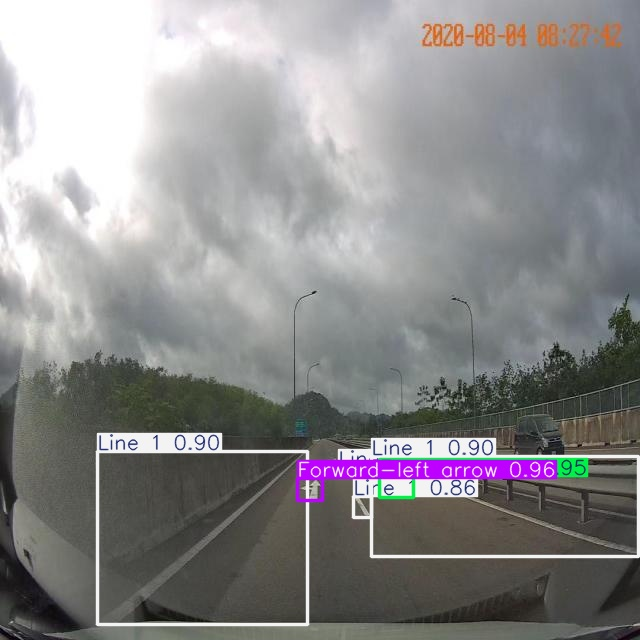

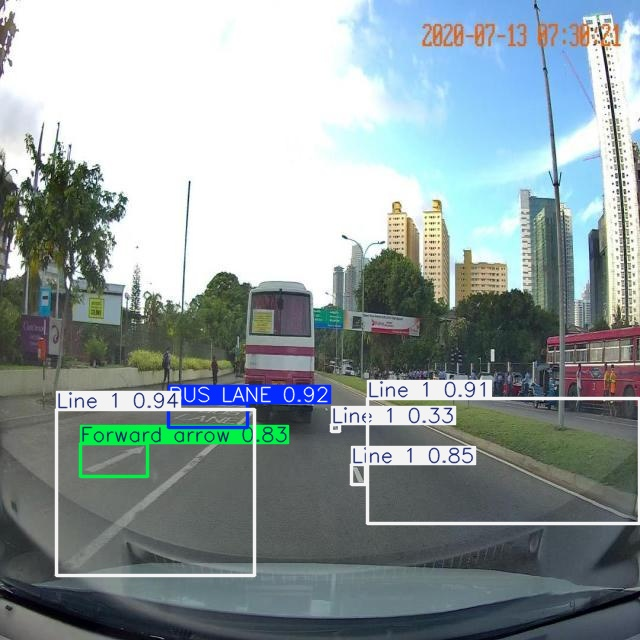

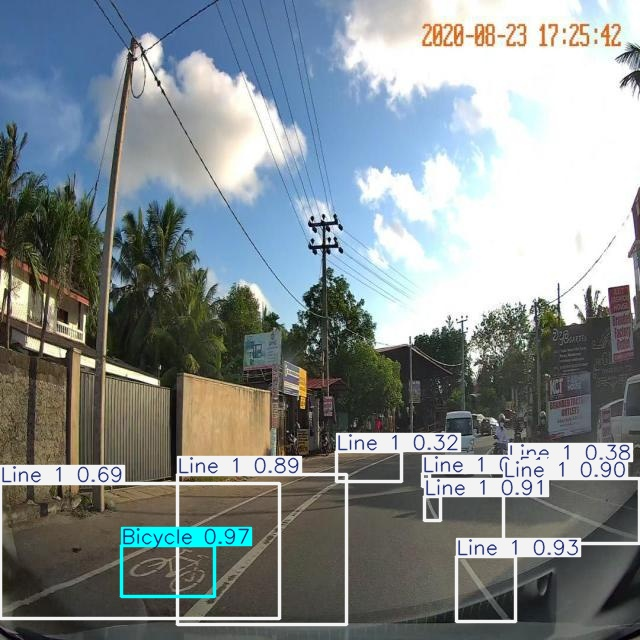

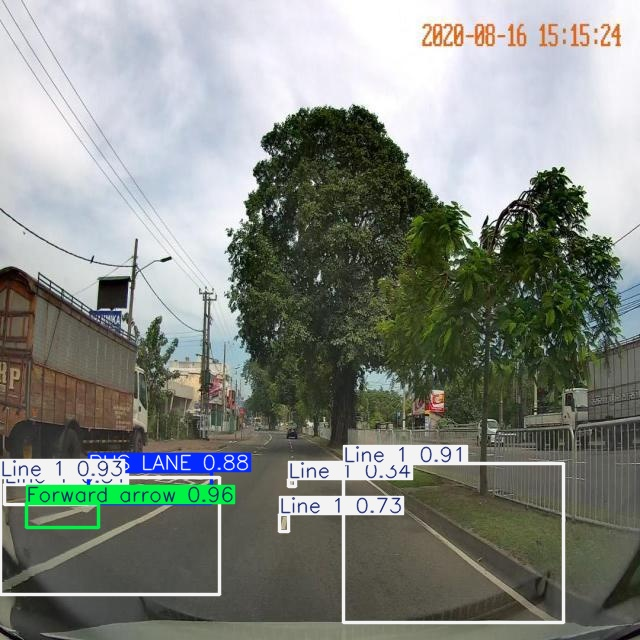

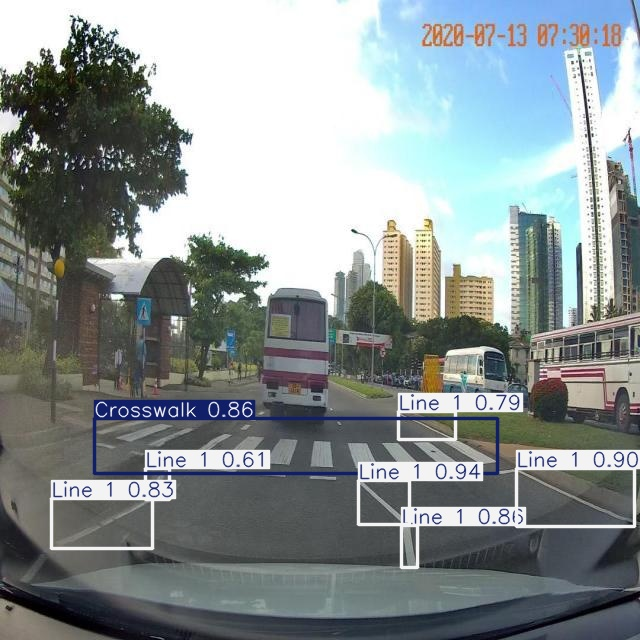

In [14]:
import glob
from IPython.display import display, Image

# Path to the saved prediction images
result_images_path = 'runs/detect/train33/'

# Locate the saved prediction images
result_images = glob.glob(result_images_path + '*.jpg')

# Display the first 5 prediction images
for img_path in result_images[:5]:
    display(Image(filename=img_path))

In [15]:
def detect_lanes_on_video(video_path, output_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Check if video file opened successfully
    if not cap.isOpened():
        print(f"Error: Could not open video file {video_path}")
        return
    
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Create a VideoWriter object
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model.predict(source=frame)
        annotated_frame = results[0].plot()

        out.write(annotated_frame)

    cap.release()
    out.release()

# Example usage
video_path = '/kaggle/input/eng-vdo/WhatsApp Video 2024-07-11 at 1.16.34 AM.mp4'
output_path ='/kaggle/working/vdotry1.avi'
detect_lanes_on_video(video_path, output_path)


0: 384x640 1 Crosswalk, 78.3ms
Speed: 3.6ms preprocess, 78.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Crosswalk, 20.4ms
Speed: 3.3ms preprocess, 20.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Crosswalk, 20.3ms
Speed: 2.1ms preprocess, 20.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Crosswalk, 20.2ms
Speed: 3.8ms preprocess, 20.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 20.3ms
Speed: 2.7ms preprocess, 20.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Crosswalk, 19.5ms
Speed: 2.7ms preprocess, 19.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Crosswalk, 18.7ms
Speed: 2.6ms preprocess, 18.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 18.8ms
Speed: 2.0ms preprocess, 18.8ms inference, 0.7ms postproc

In [18]:
def detect_lanes_on_video(video_path, output_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Check if video file opened successfully
    if not cap.isOpened():
        print(f"Error: Could not open video file {video_path}")
        return
    
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Create a VideoWriter object
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model2.predict(source=frame)
        annotated_frame = results[0].plot()

        out.write(annotated_frame)

    cap.release()
    out.release()

# Example usage
video_path = '/kaggle/input/eng-vdo/WhatsApp Video 2024-07-11 at 1.16.34 AM.mp4'
output_path ='/kaggle/working/vdotry1_m2.avi'
detect_lanes_on_video(video_path, output_path)


0: 384x640 3 Crosswalks, 48.3ms
Speed: 3.1ms preprocess, 48.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Crosswalks, 6.8ms
Speed: 3.5ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Crosswalks, 6.7ms
Speed: 2.5ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Line 1, 2 Crosswalks, 6.6ms
Speed: 3.0ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Crosswalk, 6.6ms
Speed: 1.7ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Crosswalk, 6.6ms
Speed: 1.7ms preprocess, 6.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Crosswalk, 1 Diamond, 6.6ms
Speed: 1.7ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Crosswalk, 7.1ms
Speed: 2.3ms preprocess, 7.1ms inference, 1.2ms postp

In [28]:
def detect_lanes_on_image(image_path, output_path):
    image = cv2.imread(image_path)
    results = model2.predict(source=image)
    annotated_image = results[0].plot()
    cv2.imwrite(output_path, annotated_image)
    display(Image(filename=output_path))


0: 640x640 1 Diamond, 9.7ms
Speed: 4.2ms preprocess, 9.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


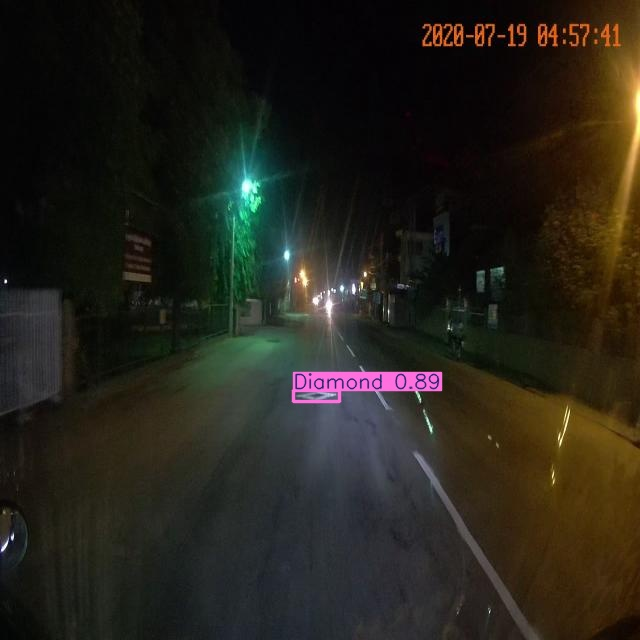

In [40]:
sample_image_path = '/kaggle/input/gdvtry/road_lane/valid/images/949a_jpg.rf.3e350907452062d1818332753b21f69e.jpg'
output_image_path = '/kaggle/working/pictrym2.jpg'
detect_lanes_on_image(sample_image_path, output_image_path)

In [30]:
def detect_lanes_on_image_m1(image_path, output_path):
    image = cv2.imread(image_path)
    results = model.predict(source=image)
    annotated_image = results[0].plot()
    cv2.imwrite(output_path, annotated_image)
    display(Image(filename=output_path))


0: 640x640 1 Diamond, 25.8ms
Speed: 2.0ms preprocess, 25.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


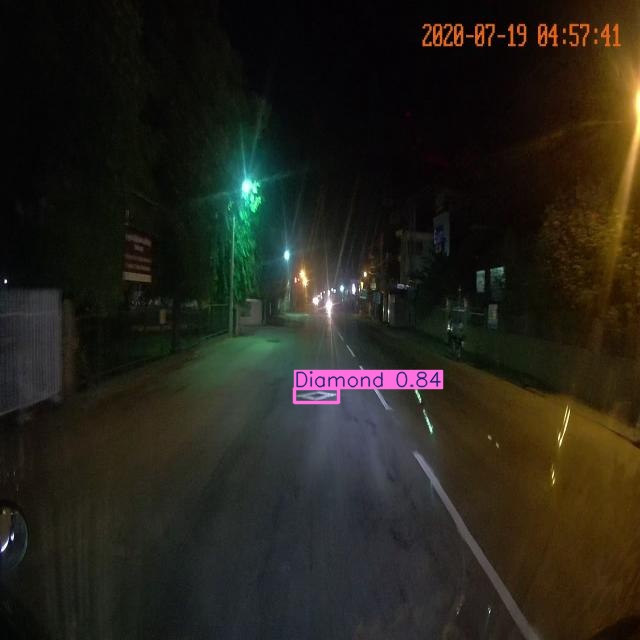

In [41]:
sample_image_path = '/kaggle/input/gdvtry/road_lane/valid/images/949a_jpg.rf.3e350907452062d1818332753b21f69e.jpg'
output_image_path = '/kaggle/working/pictrym1.jpg'
detect_lanes_on_image_m1(sample_image_path, output_image_path)


0: 640x640 1 Yellow marking, 26.8ms
Speed: 3.8ms preprocess, 26.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


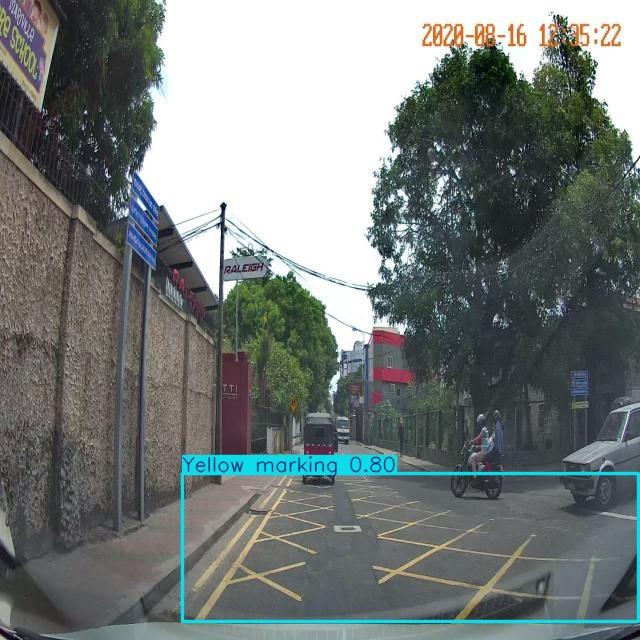

In [55]:
sample_image_path = '/kaggle/input/gdvtry/road_lane/valid/images/54b_jpg.rf.b32c30f093b741481d58602fff522dbe.jpg'
output_image_path = '/kaggle/working/54b_jpg.rf.b32c30f093b741481d58602fff522dbe_m1.jpg'
detect_lanes_on_image_m1(sample_image_path, output_image_path)


0: 640x640 1 Yellow marking, 1 Line 1, 9.4ms
Speed: 2.5ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


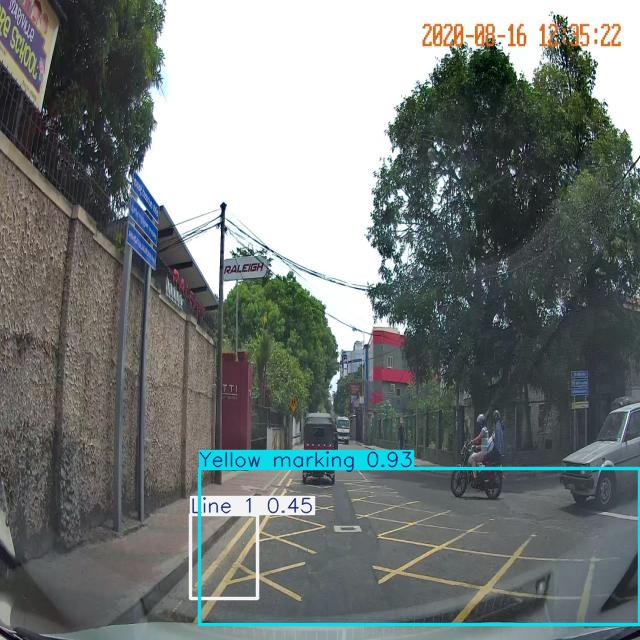

In [56]:
sample_image_path = '/kaggle/input/gdvtry/road_lane/valid/images/54b_jpg.rf.b32c30f093b741481d58602fff522dbe.jpg'
output_image_path = '/kaggle/working/54b_jpg.rf.b32c30f093b741481d58602fff522dbe_m2.jpg'
detect_lanes_on_image(sample_image_path, output_image_path)